## AeN JC3 P7 snow and ice depth


In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats

In [2]:
%matplotlib inline

In [3]:
import pandas as pd

In [4]:
#cartopy parts
import cartopy.crs as ccrs
import cartopy.feature as cfeat

import cartopy.feature as cfeature
import cartopy.io.shapereader as shpreader
from cartopy.feature import ShapelyFeature

In [5]:
def printstats(inputdata):
    print("number of observations: {}".format(len(inputdata)))
    print("min: {}".format(np.nanmin(inputdata)))
    print("max: {}".format(np.nanmax(inputdata)))
    print("mean: {}".format(np.nanmean(inputdata)))
    print("median: {}".format(np.nanmedian(inputdata)))
    print("standard deviation: {}".format(np.nanstd(inputdata)))
    print("skewness: {}".format(stats.skew(inputdata)))
    
    

### Import P7 transect data - day 1


In [6]:
mp_day1_file = "/mnt/documents/JC3/kvitøyrenna/magnaprobe/NPI14.dat"
gem2_day1_file = "/mnt/documents/JC3/kvitøyrenna/gem2/processed-survey/JC3-kvitøyrenna-transect-gem2-531-channel-thickness.csv"

In [7]:
mpcolumns = ["TIMESTAMP","RECORD","Counter","DepthCm","BattVolts","latitude_a","latitude_b","Longitude_a","Longitude_b","fix_quality","nmbr_satellites","HDOP","altitudeB","DepthVolts","LatitudeDDDDD","LongitudeDDDDD","month","dayofmonth","hourofday","minutes","seconds","microseconds"]

In [8]:
#p4snow = np.genfromtxt('P43552-timedepthlatlon-cleaned.txt')
day1snow = pd.read_csv(mp_day1_file, skiprows=5, names = mpcolumns)
day1gem2 = pd.read_csv(gem2_day1_file, low_memory=False)

In [9]:
day1snow

TIMESTAMP  RECORD  Counter  DepthCm  BattVolts  latitude_a  \
0     2002-07-23 07:28:24.19   24082   100002   121.00      12.59          80   
1     2002-07-23 07:28:27.88   24083   100003    -0.01      12.59          80   
2     2002-07-23 07:28:30.35   24084   100004   121.00      12.58          80   
3     2002-07-23 07:33:21.99   24085   100005    21.77      12.55          80   
4     2002-07-23 07:33:25.57   24086   100006    15.06      12.55          80   
...                      ...     ...      ...      ...        ...         ...   
1303   2002-07-23 08:43:36.8   25385   101305    14.73      12.39          80   
1304  2002-07-23 08:43:46.91   25386   101306   121.00      12.39          80   
1305  2002-07-23 08:43:48.09   25387   101307   121.00      12.39          80   
1306  2002-07-23 08:43:52.95   25388   101308    -0.01      12.39          80   
1307  2002-07-23 08:43:57.06   25389   101309   121.00      12.39          80   

      latitude_b  Longitude_a  Longitude_b  fix_quality  ...  altitudeB  \
0        23.1076           29      45.9467            1  ...       26.3   
1        23.1078           29      45.9471            1  ...       26.1   
2        23.1080           29      45.9474            1  ...       25.9   
3        23.1217           29      45.9757            2  ...      -12.1   
4        23.1214           29      45.9769            2  ...      -12.3   
...          ...          ...          ...          ...  ...        ...   
1303     23.4689           29      46.2369            1  ...      -13.1   
1304     23.4687           29      46.2278            1  ...      -11.6   
1305     23.4690           29      46.2289            1  ...      -11.8   
1306     23.4695           29      46.2286            1  ...      -11.5   
1307     23.4699           29      46.2298            1  ...      -11.6   

      DepthVolts  LatitudeDDDDD  LongitudeDDDDD  month  dayofmonth  hourofday  \
0          7.721       0.385127        0.765778    7.0          23        7.0   
1         -0.010       0.385130        0.765785    7.0          23        7.0   
2          7.721       0.385133        0.765790    7.0          23        7.0   
3          1.384       0.385362        0.766262    7.0          23        7.0   
4          0.960       0.385357        0.766282    7.0          23        7.0   
...          ...            ...             ...    ...         ...        ...   
1303       0.930       0.391148        0.770615    7.0          23        8.0   
1304       7.719       0.391145        0.770463    7.0          23        8.0   
1305       7.719       0.391150        0.770482    7.0          23        8.0   
1306      -0.010       0.391158        0.770477    7.0          23        8.0   
1307       7.719       0.391165        0.770497    7.0          23        8.0   

      minutes  seconds  microseconds  
0        28.0     23.0        500000  
1        28.0     27.0        200000  
2        28.0     29.0        670000  
3        33.0     21.0        310000  
4        33.0     24.0        890000  
...       ...      ...           ...  
1303     43.0     36.0        120000  
1304     43.0     46.0        230000  
1305     43.0     47.0        410000  
1306     43.0     52.0        270000  
1307     43.0     56.0        380000  

[1308 rows x 22 columns]

In [10]:
snowbins = np.arange(0,1.2,0.01)

In [11]:
def cleansnow(snowdata):
    
    #make sane latlon
    latitude = snowdata["latitude_a"].values + snowdata["LatitudeDDDDD"].values
    longitude = snowdata["Longitude_a"].values + snowdata["LongitudeDDDDD"].values
    
    
    # return metres
    snowmetres = snowdata['DepthCm'].values / 100
    
    #clean MP end values
    the_inds = np.where((snowmetres < 1.19) & (snowmetres > 0.01))
    snowmetres = snowmetres[the_inds[0]]
    latitude = latitude[the_inds[0]]
    longitude = longitude[the_inds[0]]
    
    
    return latitude, longitude, snowmetres
    

In [12]:
day1snowlat, day1snowlon, day1snow = cleansnow(day1snow)

In [13]:
len(day1snowlat)

1301

In [14]:
len(day1snow)

1301

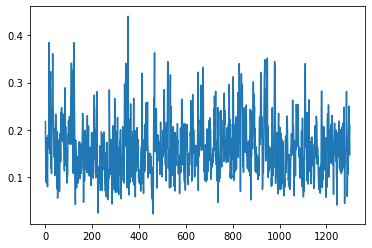

In [15]:
plt.plot(day1snow)

In [16]:
printstats(day1snow)

number of observations: 1301
min: 0.02205
max: 0.44020000000000004
mean: 0.16313338201383554
median: 0.15689999999999998
standard deviation: 0.060783349171037164
skewness: 0.7595147024533528


### Histogram
2cm bins, not a PDF

Text(0, 0.5, 'number of observations')

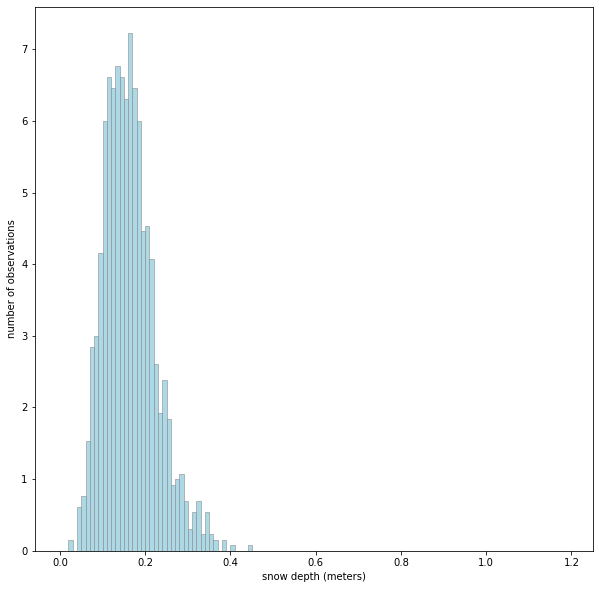

In [17]:
fig = plt.figure(figsize = (10,10))
p8hist = plt.hist(day1snow, snowbins,density=True,linewidth=0.5, ec = 'gray', facecolor='LightBlue')
plt.rcParams['font.size'] = 22
plt.xlabel("snow depth (meters)")
plt.ylabel("number of observations")
#plt.savefig("/mnt/documents/JC2-2/P9-06092021/magnaprobe/07092021/transect-mp-snowdepth-p9.png")

### Descriptive statistics

In [18]:
printstats(day1snow)

number of observations: 1301
min: 0.02205
max: 0.44020000000000004
mean: 0.16313338201383554
median: 0.15689999999999998
standard deviation: 0.060783349171037164
skewness: 0.7595147024533528


## GEM2 data

In [19]:
#gem2inputfile2 = "/mnt/documents/JC2-2/P9-06092021/gem2/07092021/JC2-2-P9-afternoon-transect-07092021-gem2-531-channel-thickness.csv"
#p9icesnow2 = pd.read_csv(gem2inputfile2)
#p9icesnow2.drop(p9icesnow2[p9icesnow2[" longitude"] == 0].index, inplace=True)
#p9icesnow2.drop(p9icesnow2[p9icesnow2[" latitude"] == 0].index, inplace=True)
#p9icesnow2.dropna(inplace = True)

In [20]:
def cleangem2(gem2df):
    gem2df.drop(gem2df[gem2df[" longitude"] == 0].index, inplace=True)
    gem2df.drop(gem2df[gem2df[" latitude"] == 0].index, inplace=True)
    gem2df.dropna(inplace = True)
    
    return gem2df
    

In [21]:
day1gem2 = cleangem2(day1gem2)

In [22]:
f450hz_hcp_i1 = [float(zi) for zi in day1gem2[" f450Hz_hcp_i"].values]
f450hz_hcp_q1 = [float(zi) for zi in day1gem2[" f450Hz_hcp_q"].values]
f1530hz_hcp_i1 = [float(zi) for zi in day1gem2[" f1530Hz_hcp_i"].values]
f1530hz_hcp_q1 = [float(zi) for zi in day1gem2[" f1530Hz_hcp_q"].values]
f5310hz_hcp_i1 = [float(zi) for zi in day1gem2[" f5310Hz_hcp_i"].values]
f5310hz_hcp_q1 = [float(zi) for zi in day1gem2[" f5310Hz_hcp_q"].values]
f18330hz_hcp_i1 = [float(zi) for zi in day1gem2[" f18330Hz_hcp_i"].values]
f18330hz_hcp_q1 = [float(zi) for zi in day1gem2[" f18330Hz_hcp_q"].values]
f63030hz_hcp_i1 = [float(zi) for zi in day1gem2[" f63030Hz_hcp_i"].values]
f63030hz_hcp_q1 = [float(zi) for zi in day1gem2[" f63030Hz_hcp_q"].values]


In [23]:
printstats(f1530hz_hcp_q1)

number of observations: 26800
min: 0.512
max: 1.255
mean: 0.7647820522388061
median: 0.757
standard deviation: 0.10562882174789236
skewness: 0.7398569068662367


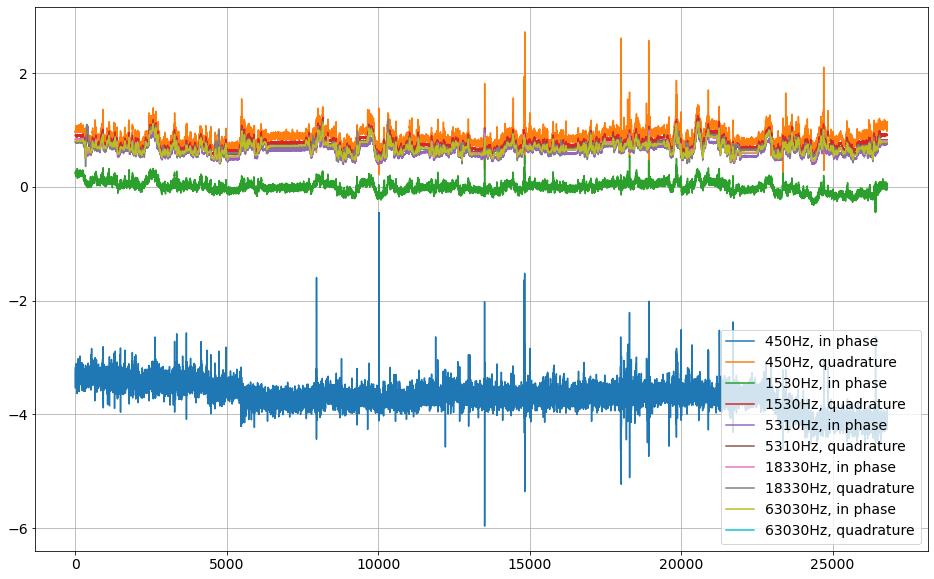

In [24]:
fig = plt.figure(figsize = (16,10))
plt.rcParams['font.size'] = 14

plt.plot(f450hz_hcp_i1, label = "450Hz, in phase")
plt.plot(f450hz_hcp_q1, label = "450Hz, quadrature")
plt.plot(f1530hz_hcp_i1, label = "1530Hz, in phase")
plt.plot(f1530hz_hcp_q1, label = "1530Hz, quadrature")
plt.plot(f5310hz_hcp_i1, label = "5310Hz, in phase")
plt.plot(f5310hz_hcp_q1, label = "5310Hz, quadrature")
plt.plot(f18330hz_hcp_i1, label = "18330Hz, in phase")
plt.plot(f18330hz_hcp_q1, label = "18330Hz, quadrature")
plt.plot(f63030hz_hcp_i1, label = "63030Hz, in phase")
plt.plot(f63030hz_hcp_q1, label = "63030Hz, quadrature")

plt.legend()
plt.grid()


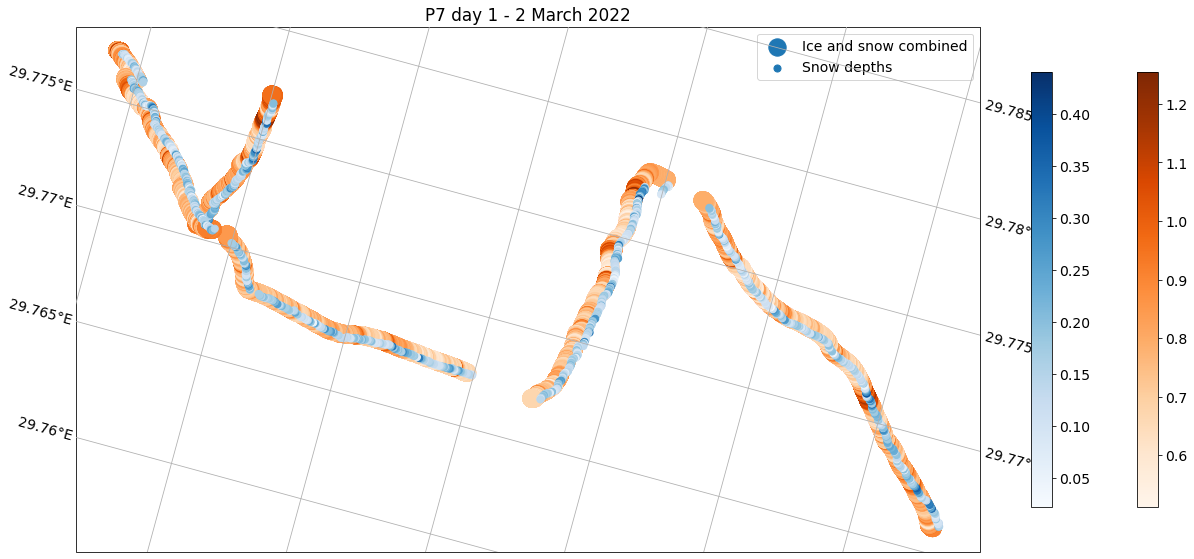

In [25]:
fig = plt.figure(figsize = (20,16))
plt.rcParams['font.size'] = 14

ax = fig.add_subplot(111,
                    projection=ccrs.NorthPolarStereo(central_longitude=-45, true_scale_latitude=70))

plt.scatter(day1gem2[" longitude"], day1gem2[" latitude"], c=f1530hz_hcp_q1, cmap="Oranges",
            s=300, label="Ice and snow combined",
            transform=ccrs.PlateCarree())
plt.colorbar(shrink=0.5, fraction=0.05)

plt.scatter(day1snowlon, day1snowlat, c=day1snow, cmap='Blues', s=50, label="Snow depths",
           transform=ccrs.PlateCarree())

plt.title("P7 day 1 - 2 March 2022")
plt.legend()

plt.colorbar(shrink=0.5, fraction=0.05)

mapgrid = ax.gridlines(y_inline=True, draw_labels=True, zorder=10000)

In [26]:
icebins = np.arange(0,3,0.05)

In [27]:
gem2weights = np.ones_like(f1530hz_hcp_i1) / len(f1530hz_hcp_i1)
#icekde = stats.gaussian_kde(f1530hz_hcp_i)

icexvals = np.linspace(0, max(icebins)-1, 1000)

In [28]:

snowweights = np.ones_like(day1snow) / (len(day1snow)*10)
snowkde = stats.gaussian_kde(day1snow / snowweights)

snowxvals = np.linspace(0, max(icebins)-1, 1000)

In [29]:
from matplotlib.ticker import FormatStrFormatter

Text(0.5, 0, 'Snow depth (meters)')

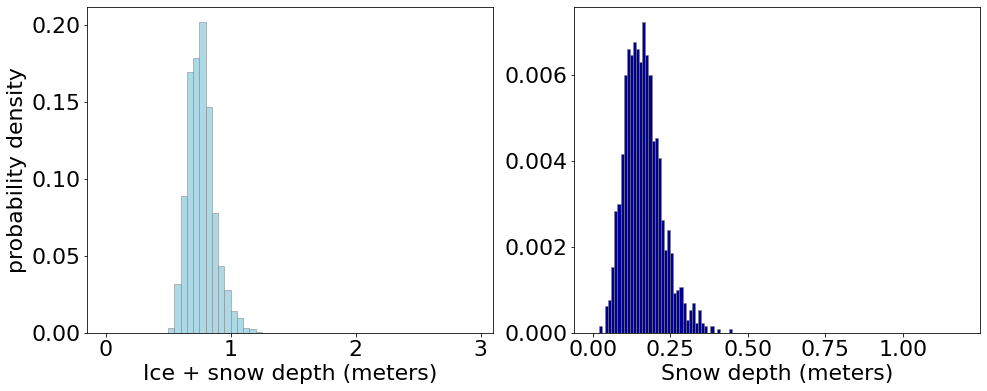

In [30]:
fig = plt.figure(figsize = (16,6))
plt.rcParams['font.size'] = 22

ax1 = fig.add_subplot(121)

ax1.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
ax2 = fig.add_subplot(122)
ax2.yaxis.set_major_formatter(FormatStrFormatter('%.3f'))

day1hist, icex, _ = ax1.hist(f1530hz_hcp_q1,icebins, linewidth=0.5, ec = 'gray', facecolor='LightBlue', weights=gem2weights, label = 'snow + ice thickness')


day1snowhist, snowx, _ = ax2.hist(day1snow,snowbins, 
                                linewidth=0.5, ec = 'gray', facecolor='DarkBlue', weights=snowweights, label = 'snow depth')


ax1.set_xlabel("Ice + snow depth (meters)")
ax1.set_ylabel("probability density")
ax2.set_xlabel("Snow depth (meters)")

#plt.savefig("/mnt/documents/JC2-2/P9-06092021/gem2/07092021/transect-all-gem2-snowice-p9.png")

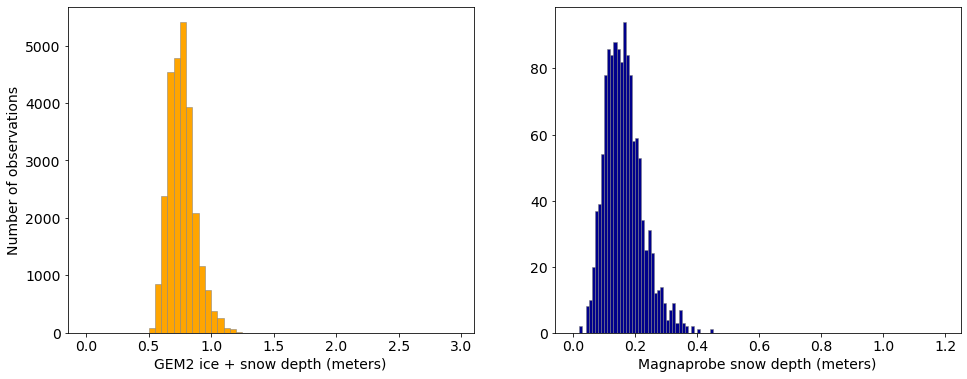

In [31]:
fig = plt.figure(figsize = (16,6))
plt.rcParams['font.size'] =14

ax1 = fig.add_subplot(121)

#ax1.yaxis.set_major_formatter(FormatStrFormatter('%.0f'))
ax2 = fig.add_subplot(122)
#ax2.yaxis.set_major_formatter(FormatStrFormatter('%.0f'))

day1hist, icex, _ = ax1.hist(f1530hz_hcp_q1,icebins, linewidth=0.5, ec = 'gray',
                             facecolor='Orange', label = 'snow + ice thickness')


day1snowhist, snowx, _ = ax2.hist(day1snow,snowbins, 
                                linewidth=0.5, ec = 'gray', facecolor='DarkBlue',
                                label = 'snow depth')


ax1.set_xlabel("GEM2 ice + snow depth (meters)")
ax1.set_ylabel("Number of observations")
ax2.set_xlabel("Magnaprobe snow depth (meters)")

plt.savefig("/mnt/documents/JC3/kvitøyrenna/transect-summary-histograms.png")

In [32]:
stats.describe(f1530hz_hcp_q1)

DescribeResult(nobs=26800, minmax=(0.512, 1.255), mean=0.7647820522388061, variance=0.011157864322068991, skewness=0.7398569068662367, kurtosis=0.953149798434406)

In [33]:
printstats(f450hz_hcp_q1)

number of observations: 26800
min: 0.204
max: 2.7230000000000003
mean: 0.8739872014925373
median: 0.863
standard deviation: 0.1269344654939235
skewness: 1.3146107496089066


In [34]:
printstats(f1530hz_hcp_q1)

number of observations: 26800
min: 0.512
max: 1.255
mean: 0.7647820522388061
median: 0.757
standard deviation: 0.10562882174789236
skewness: 0.7398569068662367


In [35]:
snowweights = np.ones_like(p9snowmetres) / len(p9snowmetres)
p8snowhist2 = plt.hist(p9snowmetres,snowbins,linewidth=0.5, ec = 'gray', facecolor='DarkBlue', weights=snowweights)

NameError: name 'p9snowmetres' is not defined

In [ ]:
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(111)

p8hist = ax.hist(f1530hz_hcp_i,icebins,linewidth=0.5, ec = 'gray', facecolor='LightBlue', weights=gem2weights)


